# Frameworks

In [1]:
!pip install tensorflow==1.14
!pip install keras==2.2.4
!pip install coremltools==3.4

     |████████████████████████████████| 109.2MB 113kB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 491kB 60.7MB/s 
     |████████████████████████████████| 3.2MB 54.2MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 317kB 5.4MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 3.4MB 5.0MB/s 


##Imports

In [7]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Bidirectional, GRU, TimeDistributed, Activation, Flatten, Embedding
from keras.optimizers import Adam
from keras.datasets import imdb

In [3]:
#take most 10000 common words in the imdb dataset
maxNumberOfWords = 10000
##work around to load imdb dataset as imdb.load_data didn't work directly for this version. https://stackoverflow.com/a/56243777/4156490
##the error is 'ValueError: Object arrays cannot be loaded when allow_pickle=False'
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maxNumberOfWords)

# restore np.load for future normal usage
np.load = np_load_old

17465344/17464789 [==============================] - 0s 0us/step


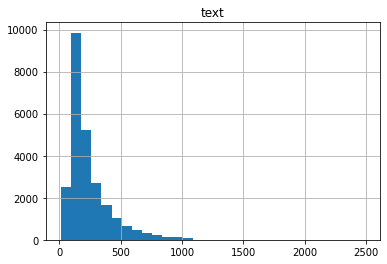

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
text_word_count = []

# populate the lists with word count
for i in x_train:
      text_word_count.append(len(i))

length_df = pd.DataFrame({'text':text_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
maxlen = 300
x_train = pad_sequences(x_train, maxlen=maxlen,padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen,padding='post')

# Prepare Keras model

In [ ]:

model = Sequential([
                    Embedding(maxNumberOfWords, 128, input_length=maxlen),
                    GRU(128, batch_size=1, return_sequences=True),
                    TimeDistributed(Dense(64)),
                    Activation('relu'),
                    TimeDistributed(Dense(32)),
                    Activation('relu'),
                    Flatten(),
                    Dense(1, activation='sigmoid')
                   ])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 128)          1280000   
_________________________________________________________________
gru_4 (GRU)                  (None, 300, 128)          98688     
_________________________________________________________________
time_distributed_7 (TimeDist (None, 300, 64)           8256      
_________________________________________________________________
activation_8 (Activation)    (None, 300, 64)           0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 300, 32)           2080      
_________________________________________________________________
activation_9 (Activation)    (None, 300, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9600)              0         
__________

#Compile and![alt text](https://) Train Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 230s 12ms/step - loss: 0.3766 - acc: 0.8173 - val_loss: 0.2793 - val_acc: 0.8860
Epoch 2/50
20000/20000 [==============================] - 230s 12ms/step - loss: 0.1858 - acc: 0.9287 - val_loss: 0.2848 - val_acc: 0.8878
Epoch 3/50
20000/20000 [==============================] - 230s 11ms/step - loss: 0.1108 - acc: 0.9580 - val_loss: 0.3112 - val_acc: 0.8896
Epoch 4/50
20000/20000 [==============================] - 228s 11ms/step - loss: 0.0683 - acc: 0.9754 - val_loss: 0.5277 - val_acc: 0.8856
Epoch 5/50
20000/20000 [==============================] - 229s 11ms/step - loss: 0.0506 - acc: 0.9831 - val_loss: 0.5710 - val_acc: 0.8810
Epoch 6/50
20000/20000 [==============================] - 229s 11ms/step - loss: 0.0335 - acc: 0.9889 - val_loss: 0.6698 - val_acc: 0.8728
Epoch 7/50
20000/20000 [==============================] - 228s 11ms/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.7

In [ ]:
model.save('imdbsentiment3.h5')

In [ ]:
from google.colab import files
files.download('imdbsentiment3.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
wordDictionary = imdb.get_word_index(
    path='imdb_word_index.json'
)


1646592/1641221 [==============================] - 0s 0us/step


In [4]:
wordDictionary

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
paddedText = pad_sequences(
    np.array([[wordDictionary["super"],wordDictionary["cool"]]]), maxlen=300,padding='post'
    )

In [11]:
paddedText

array([[1162,  643,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
model.predict(paddedText)

array([[0.6204907]], dtype=float32)

# Export Model using CoreML Tools

In [ ]:
import coremltools
coreml_model = coremltools.converters.keras.convert(model, input_names="input", output_names="output")
coreml_model.save('imdbGRU.mlmodel')